In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=0)
print(X.shape , y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [2]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.857950,4.326169,2
1,0.419611,4.553946,0
2,1.224186,4.908847,0


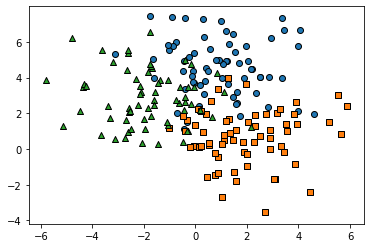

In [3]:
target_list = np.unique(y)
markers=['o','s','^','P','D','H','x']
for target in target_list:
  target_cluster = clusterDF[clusterDF['target'] == target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
              marker=markers[target])

plt.show()
  

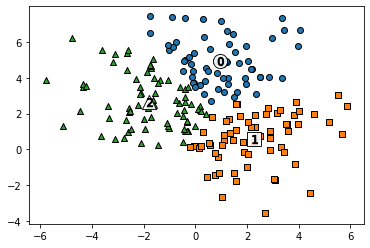

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'] , y=label_cluster['ftr2'], edgecolor='k',
              marker = markers[label])
  
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',edgecolor='k',
              marker='$%d$' % label)
  
plt.show()

In [5]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())


target  kmeans_label
0       0               53
        2                8
        1                6
1       1               55
        2                8
        0                4
2       2               58
        0                6
        1                2
Name: kmeans_label, dtype: int64
